In [149]:
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Getting Crypto Data

In [97]:
btc_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=1000&api_key=dc7641c2d9273a7e9b6f400330a9b3ee929da72e915721922ff075b8a36d7e9b"
btc_data = urlopen(btc_url).read()  
btc_json = json.loads(btc_data)

eth_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=1000&api_key=dc7641c2d9273a7e9b6f400330a9b3ee929da72e915721922ff075b8a36d7e9b"
eth_data = urlopen(eth_url).read()  
eth_json = json.loads(eth_data)

luna_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=LUNA&tsym=USD&limit=1000&api_key=dc7641c2d9273a7e9b6f400330a9b3ee929da72e915721922ff075b8a36d7e9b"
luna_data = urlopen(luna_url).read() 
luna_json = json.loads(luna_data)

xrp_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=XRP&tsym=USD&limit=1000&api_key=dc7641c2d9273a7e9b6f400330a9b3ee929da72e915721922ff075b8a36d7e9b"
xrp_data = urlopen(xrp_url).read()  
xrp_json = json.loads(xrp_data)

bnb_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BNB&tsym=USD&limit=1000&api_key=dc7641c2d9273a7e9b6f400330a9b3ee929da72e915721922ff075b8a36d7e9b"
bnb_data = urlopen(bnb_url).read()  
bnb_json = json.loads(bnb_data)

# Getting Markets Data

In [98]:
spy = yf.Ticker("SPY")
spy_df = spy.history(period = 'max')

nasdaq = yf.Ticker("^IXIC")
nasdaq_df = nasdaq.history(period = 'max')

usd_eur = yf.Ticker("EUR=X")
usd_eur_df = usd_eur.history(period = 'max')

# Calculating Returns for Crypto Assets

In [99]:
btc_price = btc_json['Data']['Data'] 
btc_df = pd.DataFrame(btc_price) 
btc_df['btc_returns'] = ((btc_df['close']/btc_df['open']) - 1) * 100 
btc_df['Date'] = btc_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')) 
btc_returns = btc_df[['Date', 'btc_returns']]

eth_price = eth_json['Data']['Data'] 
eth_df = pd.DataFrame(eth_price)
eth_df['eth_returns'] = ((eth_df['close']/eth_df['open']) - 1) * 100
eth_df['Date'] = eth_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
eth_returns = eth_df[['Date', 'eth_returns']]

luna_price = luna_json['Data']['Data'] 
luna_df = pd.DataFrame(luna_price)
luna_df['luna_returns'] = ((luna_df['close']/luna_df['open']) - 1) * 100
luna_df['Date'] = luna_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
luna_returns = luna_df[['Date', 'luna_returns']]

xrp_price = xrp_json['Data']['Data'] 
xrp_df = pd.DataFrame(xrp_price)
xrp_df['xrp_returns'] = ((xrp_df['close']/xrp_df['open']) - 1) * 100
xrp_df['Date'] = xrp_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
xrp_returns = xrp_df[['Date', 'xrp_returns']]

bnb_price = bnb_json['Data']['Data'] 
bnb_df = pd.DataFrame(bnb_price)
bnb_df['bnb_returns'] = ((bnb_df['close']/bnb_df['open']) - 1) * 100
bnb_df['Date'] = bnb_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
bnb_returns = bnb_df[['Date', 'bnb_returns']]



# Calculating Returns for  Markets Data

In [100]:
spy_df = spy_df.reset_index()
spy_df['Date'] = spy_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
spy_df['spy_returns'] = ((spy_df['Close']/spy_df['Open']) - 1) * 100
spy_returns = spy_df[['Date', 'spy_returns']]

nasdaq_df = nasdaq_df.reset_index()
nasdaq_df['Date'] = nasdaq_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
nasdaq_df['nasdaq_returns'] = ((nasdaq_df['Close']/nasdaq_df['Open']) - 1) * 100
nasdaq_returns = nasdaq_df[['Date', 'nasdaq_returns']]

usd_eur_df = usd_eur_df.reset_index()
usd_eur_df['Date'] = usd_eur_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
usd_eur_df['usd_eur_returns'] = ((usd_eur_df['Close']/usd_eur_df['Open']) - 1) * 100
usd_eur_returns = usd_eur_df[['Date', 'usd_eur_returns']]

In [101]:
spy_returns_new = spy_returns[6642:7011]
spy_returns_new = spy_returns_new.reset_index()
spy_returns_new = spy_returns_new.drop("index",axis=1)
#print(spy_returns_new)

In [102]:
nasdaq_returns_new_period1 = nasdaq_returns[12197:12566]
nasdaq_returns_new_period1 = nasdaq_returns_new_period1.reset_index()
nasdaq_returns_new_period1 = nasdaq_returns_new_period1.drop("index",axis=1)
#print(nasdaq_returns_new_period1)

In [103]:
usd_eur_returns_new_period1 = usd_eur_returns[4026:4407]
usd_eur_returns_new_period1 = usd_eur_returns_new_period1.reset_index()
usd_eur_returns_new_period1 = usd_eur_returns_new_period1.drop("index",axis=1)
#print(usd_eur_returns_new_period1)

In [104]:
spy_returns_new1 = spy_returns[7011:]
spy_returns_new1 = spy_returns_new1.reset_index()
spy_returns_new1 = spy_returns_new1.drop("index",axis=1)
#print(spy_returns_new1)

In [105]:
nasdaq_returns_new_period2 = nasdaq_returns[12566:]
nasdaq_returns_new_period2 = nasdaq_returns_new_period2.reset_index()
nasdaq_returns_new_period2 = nasdaq_returns_new_period2.drop("index",axis=1)
#print(nasdaq_returns_new_period2)

In [106]:
usd_eur_returns_new_period2 = usd_eur_returns[4407:]
usd_eur_returns_new_period2 = usd_eur_returns_new_period2.reset_index()
usd_eur_returns_new_period2 = usd_eur_returns_new_period2.drop("index",axis=1)
#print(usd_eur_returns_new_period2)

In [107]:
assets_crypto = [btc_returns, eth_returns, luna_returns, xrp_returns, bnb_returns]
def new_returns(a):
    b = a[685:]
    b = b.reset_index()
    b = b.drop("index",axis=1)
    return b

In [108]:
btc_returns_new1 = new_returns(btc_returns)
eth_returns_new1 = new_returns(eth_returns)
luna_returns_new1 = new_returns(luna_returns)
xrp_returns_new1 = new_returns(xrp_returns)
bnb_returns_new1 = new_returns(bnb_returns)

# Dividing Returns in two Time-Frames

In [109]:
x = [0,60,120,180,240,300,360]
btc_returns_new = btc_returns.iloc[x]
btc_returns_new = btc_returns_new.reset_index()
btc_returns_new = btc_returns_new.drop("index",axis=1)
eth_returns_new = eth_returns.iloc[x]
eth_returns_new = eth_returns_new.reset_index()
eth_returns_new = eth_returns_new.drop("index",axis=1)
luna_returns_new = luna_returns.iloc[x]
luna_returns_new = luna_returns_new.reset_index()
luna_returns_new = luna_returns_new.drop("index",axis=1)
xrp_returns_new = xrp_returns.iloc[x]
xrp_returns_new = xrp_returns_new.reset_index()
xrp_returns_new = xrp_returns_new.drop("index",axis=1)
bnb_returns_new = bnb_returns.iloc[x]
bnb_returns_new = bnb_returns_new.reset_index()
bnb_returns_new = bnb_returns_new.drop("index",axis=1)
spy_returns_new = spy_returns_new.iloc[x]
spy_returns_new = spy_returns_new.reset_index()
spy_returns_new = spy_returns_new.drop("index",axis=1)
nasdaq_returns_new_period1 = nasdaq_returns_new_period1.iloc[x]
nasdaq_returns_new_period1 = nasdaq_returns_new_period1.reset_index()
nasdaq_returns_new_period1 = nasdaq_returns_new_period1.drop("index",axis=1)
usd_eur_returns_new_period1 = usd_eur_returns_new_period1.iloc[x]
usd_eur_returns_new_period1 = usd_eur_returns_new_period1.reset_index()
usd_eur_returns_new_period1 = usd_eur_returns_new_period1.drop("index",axis=1)

In [110]:
#---after 2020
y = [0,60,120,180,240,300]
btc_returns_new2 = btc_returns_new1.iloc[y]
btc_returns_new2 = btc_returns_new2.reset_index()
btc_returns_new2 = btc_returns_new2.drop("index",axis=1)
eth_returns_new2 = eth_returns_new1.iloc[y]
eth_returns_new2 = eth_returns_new2.reset_index()
eth_returns_new2 = eth_returns_new2.drop("index",axis=1)
luna_returns_new2 = luna_returns_new1.iloc[y]
luna_returns_new2 = luna_returns_new2.reset_index()
luna_returns_new2 = luna_returns_new2.drop("index",axis=1)
xrp_returns_new2 = xrp_returns_new1.iloc[y]
xrp_returns_new2 = xrp_returns_new2.reset_index()
xrp_returns_new2 = xrp_returns_new2.drop("index",axis=1)
bnb_returns_new2 = bnb_returns_new1.iloc[y]
bnb_returns_new2 = bnb_returns_new2.reset_index()
bnb_returns_new2 = bnb_returns_new2.drop("index",axis=1)
spy_returns_new2 = spy_returns_new1.iloc[y]
spy_returns_new2 = spy_returns_new2.reset_index()
spy_returns_new2 = spy_returns_new2.drop("index",axis=1)
nasdaq_returns_new_period2 = nasdaq_returns_new_period2.iloc[y]
nasdaq_returns_new_period2 = nasdaq_returns_new_period2.reset_index()
nasdaq_returns_new_period2 = nasdaq_returns_new_period2.drop("index",axis=1)
usd_eur_returns_new_period2 = usd_eur_returns_new_period2.iloc[y]
usd_eur_returns_new_period2 = usd_eur_returns_new_period2.reset_index()
usd_eur_returns_new_period2 = usd_eur_returns_new_period2.drop("index",axis=1)

# Plotting Returns

Text(0.5, 1.0, 'Crypto vs SPY returns-2019-2020')

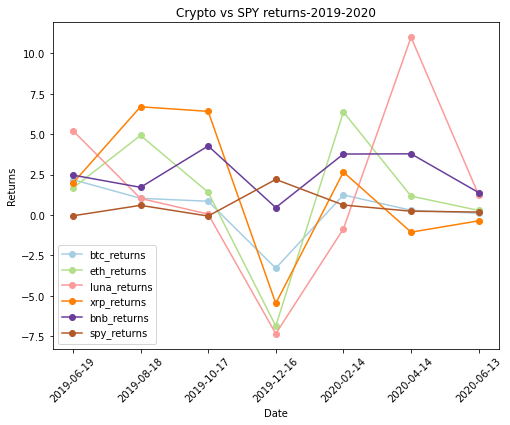

In [160]:
returns_with_spy = pd.concat([btc_returns_new["Date"],btc_returns_new["btc_returns"],eth_returns_new["eth_returns"],luna_returns_new["luna_returns"],xrp_returns_new["xrp_returns"],
                    bnb_returns_new["bnb_returns"],spy_returns_new["spy_returns"]],axis=1)
returns_with_spy.plot(figsize=(8,6), kind="line",x="Date",y=["btc_returns","eth_returns","luna_returns","xrp_returns","bnb_returns","spy_returns"],marker="o",markersize=6,rot=45,colormap='Paired')
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title('Crypto vs SPY returns-2019-2020')

Text(0.5, 1.0, 'Crypto vs SPY returns-2021-2022')

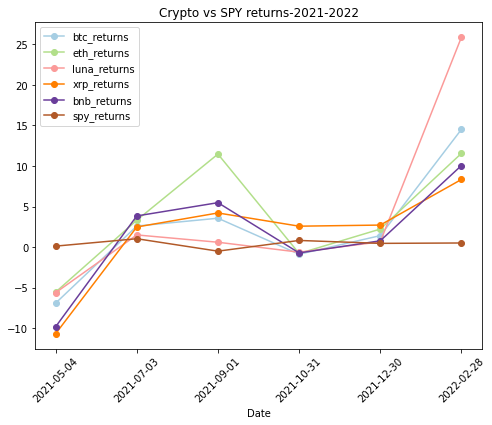

In [161]:
returns_with_spy2 = pd.concat([btc_returns_new2["Date"],btc_returns_new2["btc_returns"],eth_returns_new2["eth_returns"],luna_returns_new2["luna_returns"],xrp_returns_new2["xrp_returns"],
                    bnb_returns_new2["bnb_returns"],spy_returns_new2["spy_returns"]],axis=1)
returns_with_spy2.plot(figsize=(8,6), kind="line",x="Date",y=["btc_returns","eth_returns","luna_returns","xrp_returns","bnb_returns","spy_returns"],marker="o",markersize=6,rot=45,colormap='Paired')
plt.title('Crypto vs SPY returns-2021-2022')

Text(0.5, 1.0, 'Crypto vs NASDAQ returns-2019-2020')

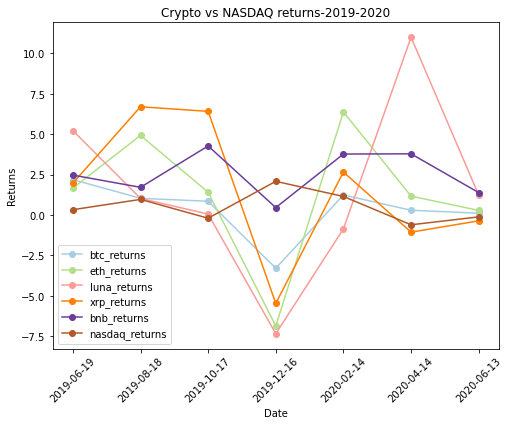

In [162]:
returns_with_nasdaq = pd.concat([btc_returns_new["Date"],btc_returns_new["btc_returns"],eth_returns_new["eth_returns"],luna_returns_new["luna_returns"],xrp_returns_new["xrp_returns"],
                    bnb_returns_new["bnb_returns"],nasdaq_returns_new_period1["nasdaq_returns"]],axis=1)
returns_with_nasdaq.plot(figsize=(8,6),kind="line",x="Date",y=["btc_returns","eth_returns","luna_returns","xrp_returns","bnb_returns","nasdaq_returns"],marker="o",markersize=6,rot=45,colormap='Paired')
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title('Crypto vs NASDAQ returns-2019-2020')

Text(0.5, 1.0, 'Crypto vs NASDAQ returns-2021-2022')

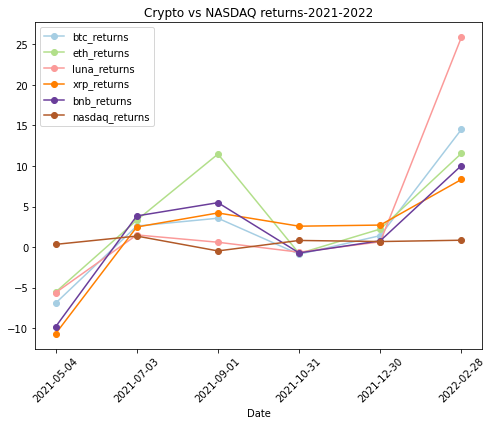

In [163]:
returns_with_nasdaq2 = pd.concat([btc_returns_new2["Date"],btc_returns_new2["btc_returns"],eth_returns_new2["eth_returns"],luna_returns_new2["luna_returns"],xrp_returns_new2["xrp_returns"],
                    bnb_returns_new2["bnb_returns"],nasdaq_returns_new_period2["nasdaq_returns"]],axis=1)
returns_with_nasdaq2.plot(figsize=(8,6),kind="line",x="Date",y=["btc_returns","eth_returns","luna_returns","xrp_returns","bnb_returns","nasdaq_returns"],marker="o",markersize=6,rot=45,colormap='Paired')
plt.title('Crypto vs NASDAQ returns-2021-2022')

Text(0.5, 1.0, 'Crypto vs USD/EUR returns-2019-2020')

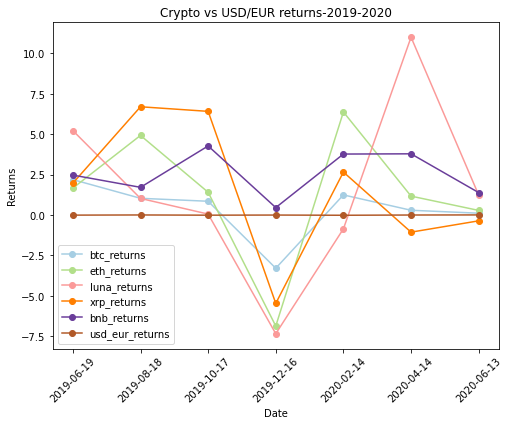

In [164]:
returns_with_usdeur = pd.concat([btc_returns_new["Date"],btc_returns_new["btc_returns"],eth_returns_new["eth_returns"],luna_returns_new["luna_returns"],xrp_returns_new["xrp_returns"],
                    bnb_returns_new["bnb_returns"],usd_eur_returns_new_period1["usd_eur_returns"]],axis=1)
returns_with_usdeur.plot(figsize=(8,6),kind="line",x="Date",y=["btc_returns","eth_returns","luna_returns","xrp_returns","bnb_returns","usd_eur_returns"],marker="o",markersize=6,rot=45,colormap='Paired')
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title('Crypto vs USD/EUR returns-2019-2020')

Text(0.5, 1.0, 'Crypto vs USD/EUR returns-2021-2022')

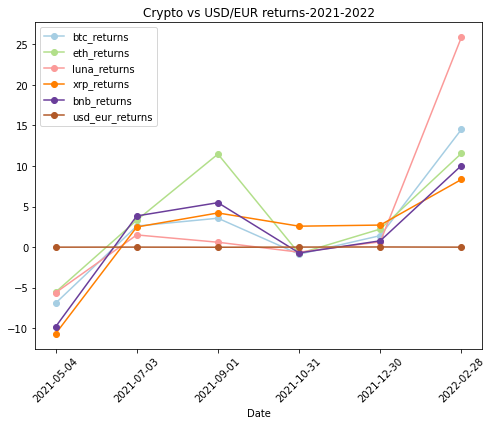

In [165]:
returns_with_usdeur2 = pd.concat([btc_returns_new2["Date"],btc_returns_new2["btc_returns"],eth_returns_new2["eth_returns"],luna_returns_new2["luna_returns"],xrp_returns_new2["xrp_returns"],
                    bnb_returns_new2["bnb_returns"],usd_eur_returns_new_period2["usd_eur_returns"]],axis=1)
returns_with_usdeur2.plot(figsize=(8,6),kind="line",x="Date",y=["btc_returns","eth_returns","luna_returns","xrp_returns","bnb_returns","usd_eur_returns"],marker="o",markersize=6,rot=45,colormap='Paired')
plt.title('Crypto vs USD/EUR returns-2021-2022')

# Heatmaps For Returns

<AxesSubplot:>

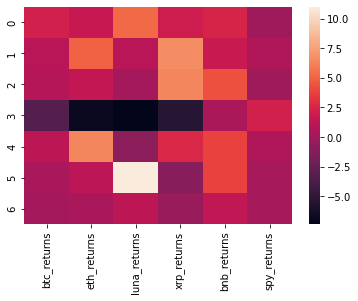

In [117]:
returns_heatmap_spy_period1 = returns_with_spy.loc[:, returns_with_spy.columns != "Date"]
sns.heatmap(returns_heatmap_spy_period1)

<AxesSubplot:>

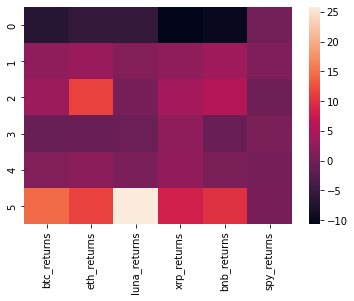

In [118]:
returns_heatmap_spy_period2 = returns_with_spy2.loc[:, returns_with_spy2.columns != "Date"]
sns.heatmap(returns_heatmap_spy_period2)

<AxesSubplot:>

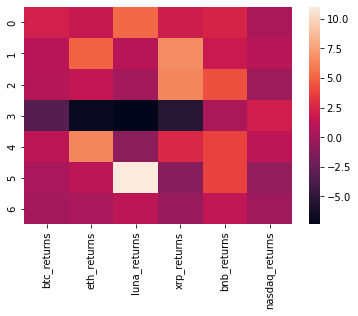

In [119]:
returns_heatmap_nasdaq_period1 = returns_with_nasdaq.loc[:, returns_with_nasdaq.columns != "Date"]
sns.heatmap(returns_heatmap_nasdaq_period1)

<AxesSubplot:>

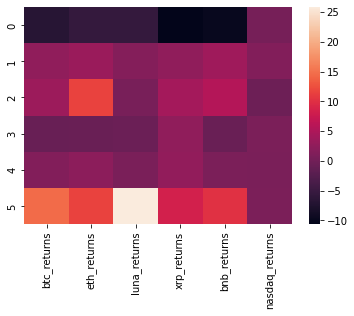

In [120]:
returns_heatmap_spy_period2 = returns_with_nasdaq2.loc[:, returns_with_nasdaq2.columns != "Date"]
sns.heatmap(returns_heatmap_spy_period2)

<AxesSubplot:>

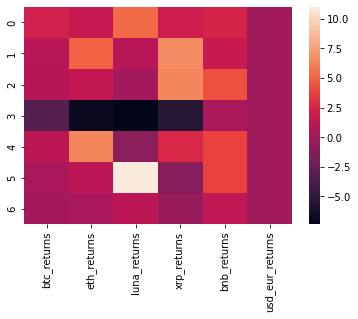

In [121]:
returns_heatmap_usdeur_period1 = returns_with_usdeur.loc[:, returns_with_usdeur.columns != "Date"]
sns.heatmap(returns_heatmap_usdeur_period1)

<AxesSubplot:>

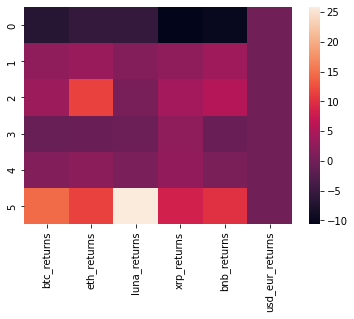

In [122]:
returns_heatmap_usdeur_period2 = returns_with_usdeur2.loc[:, returns_with_usdeur2.columns != "Date"]
sns.heatmap(returns_heatmap_usdeur_period2)

In [123]:
def calculate_correlation_onemonth(assetA_df,assetB_df):
    joint_df = pd.merge(assetA_df,assetB_df)
    correlation = joint_df.iloc[:,1].rolling(30).corr(joint_df.iloc[:,2])
    return correlation

In [124]:
def calculate_correlation_twomonths(assetA_df,assetB_df):
    joint_df = pd.merge(assetA_df,assetB_df)
    correlation = joint_df.iloc[:,1].rolling(60).corr(joint_df.iloc[:,2])
    return correlation

In [125]:
def calculate_correlation_sixmonths(assetA_df,assetB_df):
    joint_df = pd.merge(assetA_df,assetB_df)
    correlation = joint_df.iloc[:,1].rolling(180).corr(joint_df.iloc[:,2])
    return correlation

In [126]:
def calculate_correlation_oneyear(assetA_df,assetB_df):
    joint_df = pd.merge(assetA_df,assetB_df)
    correlation = joint_df.iloc[:,1].rolling(365).corr(joint_df.iloc[:,2])
    return correlation

# Correlation of CryptoAssets with S&P 500 ETF Trust

In [166]:
correlation_btc_spy_one = calculate_correlation_onemonth(btc_returns,spy_returns) 
correlation_eth_spy_one = calculate_correlation_onemonth(eth_returns,spy_returns)
correlation_luna_spy_one = calculate_correlation_onemonth(luna_returns,spy_returns)
correlation_xrp_spy_one = calculate_correlation_onemonth(xrp_returns,spy_returns)
correlation_bnb_spy_one = calculate_correlation_onemonth(bnb_returns,spy_returns)

print ("The correlation between Bitcoin and SPY over 1 month rolling mean is " + str(correlation_btc_spy_one.iloc[-1]))
print ("The correlation between Ethereum and SPY over 1 month rolling mean is " + str(correlation_eth_spy_one.iloc[-1]))
print ("The correlation between Luna and SPY over 1 month rolling mean is " + str(correlation_luna_spy_one.iloc[-1]))
print ("The correlation between XRP and SPY over 1 month rolling mean is " + str(correlation_xrp_spy_one.iloc[-1]))
print ("The correlation between BNB and SPY over 1 month rolling mean is " + str(correlation_bnb_spy_one.iloc[-1]))

The correlation between Bitcoin and SPY over 1 month rolling mean is 0.29532963224879427
The correlation between Ethereum and SPY over 1 month rolling mean is 0.3688459822741066
The correlation between Luna and SPY over 1 month rolling mean is 0.37942535949324696
The correlation between XRP and SPY over 1 month rolling mean is 0.20360615954190742
The correlation between BNB and SPY over 1 month rolling mean is 0.10520142697976072


In [167]:
correlation_btc_spy_two = calculate_correlation_twomonths(btc_returns,spy_returns) 
correlation_eth_spy_two = calculate_correlation_twomonths(eth_returns,spy_returns)
correlation_luna_spy_two = calculate_correlation_twomonths(luna_returns,spy_returns)
correlation_xrp_spy_two = calculate_correlation_twomonths(xrp_returns,spy_returns)
correlation_bnb_spy_two = calculate_correlation_twomonths(bnb_returns,spy_returns)

print ("The correlation between Bitcoin and SPY over 2 months rolling mean is " + str(correlation_btc_spy_two.iloc[-1]))
print ("The correlation between Ethereum and SPY over 2 months rolling mean is " + str(correlation_eth_spy_two.iloc[-1]))
print ("The correlation between Luna and SPY over 2 months rolling mean is " + str(correlation_luna_spy_two.iloc[-1]))
print ("The correlation between XRP and SPY over 2 months rolling mean is " + str(correlation_xrp_spy_two.iloc[-1]))
print ("The correlation between BNB and SPY over 2 months rolling mean is " + str(correlation_bnb_spy_two.iloc[-1]))

The correlation between Bitcoin and SPY over 2 months rolling mean is 0.3725582589554583
The correlation between Ethereum and SPY over 2 months rolling mean is 0.4121971471796638
The correlation between Luna and SPY over 2 months rolling mean is 0.3087995855799239
The correlation between XRP and SPY over 2 months rolling mean is 0.28950699748581593
The correlation between BNB and SPY over 2 months rolling mean is 0.24104687562153404


In [168]:
correlation_btc_spy_six = calculate_correlation_sixmonths(btc_returns,spy_returns) 
correlation_eth_spy_six = calculate_correlation_sixmonths(eth_returns,spy_returns)
correlation_luna_spy_six = calculate_correlation_sixmonths(luna_returns,spy_returns)
correlation_xrp_spy_six = calculate_correlation_sixmonths(xrp_returns,spy_returns)
correlation_bnb_spy_six = calculate_correlation_sixmonths(bnb_returns,spy_returns)

print ("The correlation between Bitcoin and SPY over 6 months rolling mean is " + str(correlation_btc_spy_six.iloc[-1]))
print ("The correlation between Ethereum and SPY over 6 months rolling mean is " + str(correlation_eth_spy_six.iloc[-1]))
print ("The correlation between Luna and SPY over 6 months rolling mean is " + str(correlation_luna_spy_six.iloc[-1]))
print ("The correlation between XRP and SPY over 6 months rolling mean is " + str(correlation_xrp_spy_six.iloc[-1]))
print ("The correlation between BNB and SPY over 6 months rolling mean is " + str(correlation_bnb_spy_six.iloc[-1]))

The correlation between Bitcoin and SPY over 6 months rolling mean is 0.29997707275448304
The correlation between Ethereum and SPY over 6 months rolling mean is 0.30570939757334165
The correlation between Luna and SPY over 6 months rolling mean is -0.008448920180905697
The correlation between XRP and SPY over 6 months rolling mean is 0.21398774546853222
The correlation between BNB and SPY over 6 months rolling mean is 0.2136299599634843


In [169]:
correlation_btc_spy_twelve = calculate_correlation_oneyear(btc_returns,spy_returns) 
correlation_eth_spy_twelve = calculate_correlation_oneyear(eth_returns,spy_returns)
correlation_luna_spy_twelve = calculate_correlation_oneyear(luna_returns,spy_returns)
correlation_xrp_spy_twelve = calculate_correlation_oneyear(xrp_returns,spy_returns)
correlation_bnb_spy_twelve = calculate_correlation_oneyear(bnb_returns,spy_returns)

print ("The correlation between Bitcoin and SPY over 1 year rolling mean is " + str(correlation_btc_spy_twelve.iloc[-1]))
print ("The correlation between Ethereum and SPY over 1 year rolling mean is " + str(correlation_eth_spy_twelve.iloc[-1]))
print ("The correlation between Luna and SPY over 1 year rolling mean is " + str(correlation_luna_spy_twelve.iloc[-1]))
print ("The correlation between XRP and SPY over 1 year rolling mean is " + str(correlation_xrp_spy_twelve.iloc[-1]))
print ("The correlation between BNB and SPY over 1 year rolling mean is " + str(correlation_bnb_spy_twelve.iloc[-1]))

The correlation between Bitcoin and SPY over 1 year rolling mean is 0.2213622646148362
The correlation between Ethereum and SPY over 1 year rolling mean is 0.19490524764326214
The correlation between Luna and SPY over 1 year rolling mean is -0.005895531807990303
The correlation between XRP and SPY over 1 year rolling mean is 0.13486790573537105
The correlation between BNB and SPY over 1 year rolling mean is 0.11871181980405955


# Correlation of CryptoAssets with NASDAQ Composite

In [175]:
correlation_btc_nasdaq_one = calculate_correlation_onemonth(btc_returns,nasdaq_returns) 
correlation_eth_nasdaq_one = calculate_correlation_onemonth(eth_returns,nasdaq_returns)
correlation_luna_nasdaq_one = calculate_correlation_onemonth(luna_returns,nasdaq_returns)
correlation_xrp_nasdaq_one = calculate_correlation_onemonth(xrp_returns,nasdaq_returns)
correlation_bnb_nasdaq_one = calculate_correlation_onemonth(bnb_returns,nasdaq_returns)

print ("The correlation between Bitcoin and NASDAQ over 1 month rolling mean is " + str(correlation_btc_nasdaq_one.iloc[-1]))
print ("The correlation between Ethereum and NASDAQ over 1 month rolling mean is " + str(correlation_eth_nasdaq_one.iloc[-1]))
print ("The correlation between Luna and NASDAQ over 1 month rolling mean is " + str(correlation_luna_nasdaq_one.iloc[-1]))
print ("The correlation between XRP and NASDAQ over 1 month rolling mean is " + str(correlation_xrp_nasdaq_one.iloc[-1]))
print ("The correlation between BNB and NASDAQ over 1 month rolling mean is " + str(correlation_bnb_nasdaq_one.iloc[-1]))

The correlation between Bitcoin and NASDAQ over 1 month rolling mean is 0.3904242676197244
The correlation between Ethereum and NASDAQ over 1 month rolling mean is 0.43799808248985095
The correlation between Luna and NASDAQ over 1 month rolling mean is 0.43908856327320583
The correlation between XRP and NASDAQ over 1 month rolling mean is 0.22137966415648908
The correlation between BNB and NASDAQ over 1 month rolling mean is 0.17401707153836196


In [176]:
correlation_btc_nasdaq_two = calculate_correlation_twomonths(btc_returns,nasdaq_returns) 
correlation_eth_nasdaq_two = calculate_correlation_twomonths(eth_returns,nasdaq_returns)
correlation_luna_nasdaq_two = calculate_correlation_twomonths(luna_returns,nasdaq_returns)
correlation_xrp_nasdaq_two = calculate_correlation_twomonths(xrp_returns,nasdaq_returns)
correlation_bnb_nasdaq_two = calculate_correlation_twomonths(bnb_returns,nasdaq_returns)

print ("The correlation between Bitcoin and NASDAQ over 2 months rolling mean is " + str(correlation_btc_nasdaq_two.iloc[-1]))
print ("The correlation between Ethereum and NASDAQ over 2 months rolling mean is " + str(correlation_eth_nasdaq_two.iloc[-1]))
print ("The correlation between Luna and NASDAQ over 2 months rolling mean is " + str(correlation_luna_nasdaq_two.iloc[-1]))
print ("The correlation between XRP and NASDAQ over 2 months rolling mean is " + str(correlation_xrp_nasdaq_two.iloc[-1]))
print ("The correlation between BNB and NASDAQ over 2 months rolling mean is " + str(correlation_bnb_nasdaq_two.iloc[-1]))

The correlation between Bitcoin and NASDAQ over 2 months rolling mean is 0.42639834348142586
The correlation between Ethereum and NASDAQ over 2 months rolling mean is 0.4342871197957998
The correlation between Luna and NASDAQ over 2 months rolling mean is 0.35521411402870867
The correlation between XRP and NASDAQ over 2 months rolling mean is 0.30182767398647936
The correlation between BNB and NASDAQ over 2 months rolling mean is 0.2642020806514038


In [177]:
correlation_btc_nasdaq_six = calculate_correlation_sixmonths(btc_returns,nasdaq_returns) 
correlation_eth_nasdaq_six = calculate_correlation_sixmonths(eth_returns,nasdaq_returns)
correlation_luna_nasdaq_six = calculate_correlation_sixmonths(luna_returns,nasdaq_returns)
correlation_xrp_nasdaq_six = calculate_correlation_sixmonths(xrp_returns,nasdaq_returns)
correlation_bnb_nasdaq_six = calculate_correlation_sixmonths(bnb_returns,nasdaq_returns)

print ("The correlation between Bitcoin and NASDAQ over 6 months rolling mean is " + str(correlation_btc_nasdaq_six.iloc[-1]))
print ("The correlation between Ethereum and NASDAQ over 6 months rolling mean is " + str(correlation_eth_nasdaq_six.iloc[-1]))
print ("The correlation between Luna and NASDAQ over 6 months rolling mean is " + str(correlation_luna_nasdaq_six.iloc[-1]))
print ("The correlation between XRP and NASDAQ over 6 months rolling mean is " + str(correlation_xrp_nasdaq_six.iloc[-1]))
print ("The correlation between BNB and NASDAQ over 6 months rolling mean is " + str(correlation_bnb_nasdaq_six.iloc[-1]))

The correlation between Bitcoin and NASDAQ over 6 months rolling mean is 0.33435112298431596
The correlation between Ethereum and NASDAQ over 6 months rolling mean is 0.33423989801550036
The correlation between Luna and NASDAQ over 6 months rolling mean is -0.0075179107842073285
The correlation between XRP and NASDAQ over 6 months rolling mean is 0.21939919975020852
The correlation between BNB and NASDAQ over 6 months rolling mean is 0.22415003455710547


In [173]:
correlation_btc_nasdaq_twelve = calculate_correlation_oneyear(btc_returns,nasdaq_returns) 
correlation_eth_nasdaq_twelve = calculate_correlation_oneyear(eth_returns,nasdaq_returns)
correlation_luna_nasdaq_twelve = calculate_correlation_oneyear(luna_returns,nasdaq_returns)
correlation_xrp_nasdaq_twelve = calculate_correlation_oneyear(xrp_returns,nasdaq_returns)
correlation_bnb_nasdaq_twelve = calculate_correlation_oneyear(bnb_returns,nasdaq_returns)

print ("The correlation between Bitcoin and NASDAQ over 1 year rolling mean is " + str(correlation_btc_nasdaq_twelve.iloc[-1]))
print ("The correlation between Ethereum and NASDAQ over 1 year rolling mean is " + str(correlation_eth_nasdaq_twelve.iloc[-1]))
print ("The correlation between Luna and NASDAQ over 1 year rolling mean is " + str(correlation_luna_nasdaq_twelve.iloc[-1]))
print ("The correlation between XRP and NASDAQ over 1 year rolling mean is " + str(correlation_xrp_nasdaq_twelve.iloc[-1]))
print ("The correlation between BNB and NASDAQ over 1 year rolling mean is " + str(correlation_bnb_nasdaq_twelve.iloc[-1]))

The correlation between Bitcoin and NASDAQ over 1 year rolling mean is 0.24351455234076236
The correlation between Ethereum and NASDAQ over 1 year rolling mean is 0.21177685496285026
The correlation between Luna and NASDAQ over 1 year rolling mean is -0.005943552716595718
The correlation between XRP and NASDAQ over 1 year rolling mean is 0.1338763349641574
The correlation between BNB and NASDAQ over 1 year rolling mean is 0.1403731628838954


# Correlation of CryptoAssets with USD/EUR Rates

In [178]:
correlation_btc_uerate_one = calculate_correlation_onemonth(btc_returns,usd_eur_returns) 
correlation_eth_uerate_one = calculate_correlation_onemonth(eth_returns,usd_eur_returns)
correlation_luna_uerate_one = calculate_correlation_onemonth(luna_returns,usd_eur_returns)
correlation_xrp_uerate_one = calculate_correlation_onemonth(xrp_returns,usd_eur_returns)
correlation_bnb_uerate_one = calculate_correlation_onemonth(bnb_returns,usd_eur_returns)

print ("The correlation between Bitcoin and USD/EUR Rates over 1 month rolling mean is " + str(correlation_btc_uerate_one.iloc[-1]))
print ("The correlation between Ethereum and USD/EUR Rates over 1 month rolling mean is " + str(correlation_eth_uerate_one.iloc[-1]))
print ("The correlation between Luna and USD/EUR Rates over 1 month rolling mean is " + str(correlation_luna_uerate_one.iloc[-1]))
print ("The correlation between XRP and USD/EUR Rates over 1 month rolling mean is " + str(correlation_xrp_uerate_one.iloc[-1]))
print ("The correlation between BNB and USD/EUR Rates over 1 month rolling mean is " + str(correlation_bnb_uerate_one.iloc[-1]))

The correlation between Bitcoin and USD/EUR Rates over 1 month rolling mean is 0.12574141799804878
The correlation between Ethereum and USD/EUR Rates over 1 month rolling mean is 0.128913636927345
The correlation between Luna and USD/EUR Rates over 1 month rolling mean is 0.18580975100677616
The correlation between XRP and USD/EUR Rates over 1 month rolling mean is 0.06644337748482167
The correlation between BNB and USD/EUR Rates over 1 month rolling mean is 0.08910896648675967


In [179]:
correlation_btc_uerate_two = calculate_correlation_twomonths(btc_returns,usd_eur_returns) 
correlation_eth_uerate_two = calculate_correlation_twomonths(eth_returns,usd_eur_returns)
correlation_luna_uerate_two = calculate_correlation_twomonths(luna_returns,usd_eur_returns)
correlation_xrp_uerate_two = calculate_correlation_twomonths(xrp_returns,usd_eur_returns)
correlation_bnb_uerate_two = calculate_correlation_twomonths(bnb_returns,usd_eur_returns)

print ("The correlation between Bitcoin and USD/EUR Rates over 2 months rolling mean is " + str(correlation_btc_uerate_two.iloc[-1]))
print ("The correlation between Ethereum and USD/EUR Rates over 2 months rolling mean is " + str(correlation_eth_uerate_two.iloc[-1]))
print ("The correlation between Luna and USD/EUR Rates over 2 months rolling mean is " + str(correlation_luna_uerate_two.iloc[-1]))
print ("The correlation between XRP and USD/EUR Rates over 2 months rolling mean is " + str(correlation_xrp_uerate_two.iloc[-1]))
print ("The correlation between BNB and USD/EUR Rates over 2 months rolling mean is " + str(correlation_bnb_uerate_two.iloc[-1]))

The correlation between Bitcoin and USD/EUR Rates over 2 months rolling mean is 0.07972686180570411
The correlation between Ethereum and USD/EUR Rates over 2 months rolling mean is 0.070465921890836
The correlation between Luna and USD/EUR Rates over 2 months rolling mean is 0.11795597621199266
The correlation between XRP and USD/EUR Rates over 2 months rolling mean is 0.045095066860323794
The correlation between BNB and USD/EUR Rates over 2 months rolling mean is 0.059619443875509916


In [180]:
correlation_btc_uerate_six = calculate_correlation_sixmonths(btc_returns,usd_eur_returns) 
correlation_eth_uerate_six = calculate_correlation_sixmonths(eth_returns,usd_eur_returns)
correlation_luna_uerate_six = calculate_correlation_sixmonths(luna_returns,usd_eur_returns)
correlation_xrp_uerate_six = calculate_correlation_sixmonths(xrp_returns,usd_eur_returns)
correlation_bnb_uerate_six = calculate_correlation_sixmonths(bnb_returns,usd_eur_returns)

print ("The correlation between Bitcoin and USD/EUR Rates over 6 months rolling mean is " + str(correlation_btc_uerate_six.iloc[-1]))
print ("The correlation between Ethereum and USD/EUR Rates over 6 months rolling mean is " + str(correlation_eth_uerate_six.iloc[-1]))
print ("The correlation between Luna and USD/EUR Rates over 6 months rolling mean is " + str(correlation_luna_uerate_six.iloc[-1]))
print ("The correlation between XRP and USD/EUR Rates over 6 months rolling mean is " + str(correlation_xrp_uerate_six.iloc[-1]))
print ("The correlation between BNB and USD/EUR Rates over 6 months rolling mean is " + str(correlation_bnb_uerate_six.iloc[-1]))

The correlation between Bitcoin and USD/EUR Rates over 6 months rolling mean is 0.09121789203850426
The correlation between Ethereum and USD/EUR Rates over 6 months rolling mean is 0.11314452198241468
The correlation between Luna and USD/EUR Rates over 6 months rolling mean is 0.005482706308302131
The correlation between XRP and USD/EUR Rates over 6 months rolling mean is 0.041212508997737596
The correlation between BNB and USD/EUR Rates over 6 months rolling mean is 0.1250428989609289


In [181]:
correlation_btc_uerate_twelve = calculate_correlation_oneyear(btc_returns,usd_eur_returns) 
correlation_eth_uerate_twelve = calculate_correlation_oneyear(eth_returns,usd_eur_returns)
correlation_luna_uerate_twelve = calculate_correlation_oneyear(luna_returns,usd_eur_returns)
correlation_xrp_uerate_twelve = calculate_correlation_oneyear(xrp_returns,usd_eur_returns)
correlation_bnb_uerate_twelve = calculate_correlation_oneyear(bnb_returns,usd_eur_returns)

print ("The correlation between Bitcoin and USD/EUR Rates over 1 year rolling mean is " + str(correlation_btc_uerate_twelve.iloc[-1]))
print ("The correlation between Ethereum and USD/EUR Rates over 1 year rolling mean is " + str(correlation_eth_uerate_twelve.iloc[-1]))
print ("The correlation between Luna and USD/EUR Rates over 1 year rolling mean is " + str(correlation_luna_uerate_twelve.iloc[-1]))
print ("The correlation between XRP and USD/EUR Rates over 1 year rolling mean is " + str(correlation_xrp_uerate_twelve.iloc[-1]))
print ("The correlation between BNB and USD/EUR Rates over 1 year rolling mean is " + str(correlation_bnb_uerate_twelve.iloc[-1]))

The correlation between Bitcoin and USD/EUR Rates over 1 year rolling mean is 0.05819421827290295
The correlation between Ethereum and USD/EUR Rates over 1 year rolling mean is 0.07860028898887855
The correlation between Luna and USD/EUR Rates over 1 year rolling mean is 0.008194003102916013
The correlation between XRP and USD/EUR Rates over 1 year rolling mean is -0.014449148347119252
The correlation between BNB and USD/EUR Rates over 1 year rolling mean is 0.05050997808243878
